# HOMEWORK 6 - APPLIED ALGORITHMS

## Name: Harshit Shiroiya
## Email:  hshiroiy@iu.edu

### Partner Name: Soujanya Kota

## Problem 1: Expectation-Maximization Algorithm for Clustering

    Implement expectation-maximization algorithm for Gaussian mixture models (see the EM algorithm below) in Python and call this program Gk. As you present your code explain your protocol for 
    1. initializing each Gaussian
    2. deciding ties
    3. stopping criteria

In [ ]:
def exp_max(D, k, eps):

    #random_seed=36788765
    #np.random.seed(random_seed)

    n = len(D)
    #initializing means
    means = []
    for i in range(k):
    means.append(D.iloc[np.random.randint(1,n)])
    means = (means)

    #initializing covariance
    sigma = []
    for i in range(k):
    sigma.append(np.identity(len(D.columns))+np.identity(len(D.columns))*0.0002)

    #initilizing priors
    pC = []
    for i in range(k):
    pC.append(1/k)
    loop = 0
    while(True):
    #print("iteration",loop)
    #EXPECTATION Step
    w = [[0 for i in range(n)] for j in range(k)]
    for i in range(k):
        for j in range(n):
            X = D.iloc[j]
        num = multivariate_normal.pdf(X, means[i], sigma[i], allow_singular=True)*pC[i]
        den = 0
        for a in range(k):
              den = den + multivariate_normal.pdf(X, means[a], sigma[a], allow_singular=True)*pC[a]

        w[i][j] = num/den

      #print(np.sum(np.array(w[i])))

    #return w
    prev_means = copy.deepcopy(means)
    #MAXIMIZATION Step
    for i in range(k):

        num_mean = copy.deepcopy(means[i])*0
        num_cov = np.zeros(shape = (len(D.columns), len(D.columns)))
        num_prior = 0

        den = np.sum(np.array(w[i]))

      #Updating MEAN
      for j in range(n):
        X = np.array(D.iloc[j])
        num_mean = num_mean + w[i][j]*X

        means[i] = num_mean/den


      #Updating COVARIANCE
      for j in range(n):
        num_cov = num_cov + w[i][j]*np.dot(np.transpose(np.array(X)-np.array(prev_means[i])),(np.array(X)-np.array(prev_means[i])))
        sigma[i] = num_cov/den


      #Updating PRIORS
      pC[i] = den/n

    #End of Maximization

    error = 0
    for i in range(k):
        g = means[i]-prev_means[i]
        sum = 0
    for j in range(len(means[i])):
        sum = sum + g[j]*g[j]
        error = error + np.sqrt(sum)
    print("ERROR:",error)
    loop = loop+1
    if (error<=eps):
    return [w,means,loop]



In [1]:
import pandas as pd
import numpy as np
import math
from scipy.stats import multivariate_normal
import copy

## Problem 2: Analysis of the EM over Real-world Data Sets

    Run your EM program, Gk, against the Ringnorm and Ionosphere data sets. Discuss your
    results.
    • Ringnorm Data Set
    • Ionosphere Data Set
    Run Gk with k = 2, . . . , 5 (20 runs each for each k). Report error rates and iteration counts
    for each k using whisker plots. An example of whisker can be found in the appendix.
    A simple error rate can be calculated as follows:
    • After Gk converges, combine the clusters to ended up with two clusters for any k  

In [2]:
ringnorm=pd.read_csv("/content/Dataset.data", sep = '\s+', header = None)
ringnorm.drop([ringnorm.columns[20]],axis=1, inplace=True)
ringnorm_test = pd.read_csv("/content/Dataset.data", sep = '\s+', header = None)
iono = pd.read_csv("/content/ionosphere.data", sep = ',', header = None)
iono_test = pd.read_csv("/content/ionosphere.data", sep = ',', header = None)
iono.drop([iono.columns[34]],axis=1, inplace=True)

In [360]:
def exp_max(D, k, eps):

  #random_seed=36788765
  #np.random.seed(random_seed)

    n = len(D)
  #initializing means
    means = []
    for i in range(k):
        means.append(D.iloc[np.random.randint(1,n)])
        means = (means)
  
  #initializing covariance
    sigma = []
    for i in range(k):
        sigma.append(np.identity(len(D.columns))+np.identity(len(D.columns))*0.0002)
  
  #initilizing priors
    pC = []
    for i in range(k):
        pC.append(1/k)
        loop = 0
    while(True):
        w = [[0 for i in range(n)] for j in range(k)]
        for i in range(k):
            for j in range(n):
            X = D.iloc[j]
            num = multivariate_normal.pdf(X, means[i], sigma[i], allow_singular=True)*pC[i]
            den = 0
            for a in range(k):
                den = den + multivariate_normal.pdf(X, means[a], sigma[a], allow_singular=True)*pC[a]

            w[i][j] = num/den
        
     
    prev_means = copy.deepcopy(means)
    
    for i in range(k):

        num_mean = copy.deepcopy(means[i])*0
        num_cov = np.zeros(shape = (len(D.columns), len(D.columns)))
        num_prior = 0

        den = np.sum(np.array(w[i]))
    for j in range(n):
        X = np.array(D.iloc[j])
        num_mean = num_mean + w[i][j]*X

        means[i] = num_mean/den


      
      for j in range(n):
        num_cov = num_cov + w[i][j]*np.dot(np.transpose(np.array(X)-np.array(prev_means[i])),(np.array(X)-np.array(prev_means[i])))
        sigma[i] = num_cov/den


    
      pC[i] = den/n
    
 
    
    error = 0
    for i in range(k):
        g = means[i]-prev_means[i]
        sum = 0
        for j in range(len(means[i])):
            sum = sum + g[j]*g[j]
            error = error + np.sqrt(sum)
            print("ERROR:",error)
    loop = loop+1
    if (error<=10000):
    return [w,means,loop]



##CONVERGING THE CLUSTERS, RUNNING THEM for 20 Iterations

###IONOSPHERE DATASET

In [396]:
eps = 0.000002
clust = 2
w_mat_iono1 = [[] for j in range(4)]
iter_mat_iono1 = [[] for j in range(4)]
mean_mat_iono1 = [[] for j in range(4)]
for cl in range(2,6,1):
    print("CLUSTER NUMBER", cl)
    for i in range(20):
        print("EXP-MAX sample:",i)
        out1 = exp_max(iono, cl, eps)
        w_mat_iono1[cl-2].append(out1[0])
        iter_mat_iono1[cl-2].append(out1[2])
        mean_mat_iono1[cl-2].append(out1[1])
        print("mean sample:",i, out1[0])

CLUSTER NUMBER 2
EXP-MAX sample: 0
ERROR: 7.449825676874685
mean sample: 0 [[0.030605707938800533, 0.22317527408099022, 0.009149242836718358, 0.10640365276833288, 0.0062169533166802566, 0.04095380857622585, 0.1738721575840002, 0.46125338991164544, 0.14118665432793115, 0.020718931318766762, 0.19839311365698842, 0.007671483021234427, 0.07733837034769714, 0.26007939772323085, 0.01242798437782873, 0.27355166095458167, 0.019439939853285623, 0.07554904295120868, 0.01385288496575996, 9.659858869940461e-06, 0.06798482005237448, 0.018665867429150388, 0.020178521251356045, 0.003896004656951906, 0.034464615227906226, 0.8811306772115401, 0.052670423766423995, 0.9238352156206878, 0.00384644610693808, 0.9016805056489321, 0.05687034277233514, 0.6497498508198271, 0.0885287983147487, 0.0006972792694479946, 0.14768862485218182, 0.7497005468696555, 0.034440022495350484, 4.61119649302775e-05, 0.019426188839912192, 0.04384420196782463, 0.003462687593476571, 0.013142793325131475, 0.0011992035707159912, 0.68

In [407]:
eps = 0.000002
clust = 2
w_mat_rn1 = [[] for j in range(4)]
iter_mat_rn1 = [[] for j in range(4)]
mean_mat_rn1 = [[] for j in range(4)]
for cl in range(2,6,1):
    print("CLUSTER NUMBER", cl)
      for i in range(20):
        print("EXP-MAX sample:",i)
        out1 = exp_max(iono, cl, eps)
        w_mat_rn1[cl-2].append(out1[0])
        iter_mat_rn1[cl-2].append(out1[2])
        mean_mat_rn1[cl-2].append(out1[1])
        print("Shape",np.array(out1[0][0][:20]).shape)


CLUSTER NUMBER 2
EXP-MAX sample: 0
ERROR: 2.7315246228021874
Shape (20,)
EXP-MAX sample: 1
ERROR: 4.406613218554009
Shape (20,)
EXP-MAX sample: 2
ERROR: 2.596978769729582
Shape (20,)
EXP-MAX sample: 3
ERROR: 1.981721438193333
Shape (20,)
EXP-MAX sample: 4
ERROR: 5.580640134814076
Shape (20,)
EXP-MAX sample: 5
ERROR: 4.325007070987798
Shape (20,)
EXP-MAX sample: 6
ERROR: 6.459024693039108
Shape (20,)
EXP-MAX sample: 7
ERROR: 5.316937540524557
Shape (20,)
EXP-MAX sample: 8
ERROR: 6.221314136846285
Shape (20,)
EXP-MAX sample: 9
ERROR: 4.011890354449017
Shape (20,)
EXP-MAX sample: 10
ERROR: 4.613479361562993
Shape (20,)
EXP-MAX sample: 11
ERROR: 3.707245665457447
Shape (20,)
EXP-MAX sample: 12
ERROR: 2.153864525382488
Shape (20,)
EXP-MAX sample: 13
ERROR: 2.1882923215929795
Shape (20,)
EXP-MAX sample: 14
ERROR: 3.1844673540470465
Shape (20,)
EXP-MAX sample: 15
ERROR: 4.149160308965288
Shape (20,)
EXP-MAX sample: 16
ERROR: 2.097135710723846
Shape (20,)
EXP-MAX sample: 17
ERROR: 3.4266579021

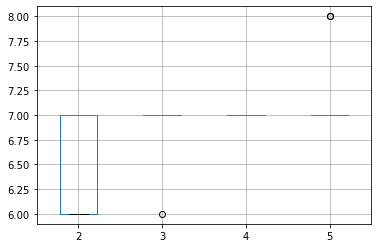

In [212]:
import matplotlib.pyplot as plt
iono_iter_df = pd.DataFrame(list(zip(iter_mat_iono1[0],iter_mat_iono1[1], iter_mat_iono1[2], iter_mat_iono1[3])), columns = ['2','3','4','5'])
bp = iono_iter_df.boxplot( column = ['2','3','4','5'])

Here, we can see that the converging of the clusters for the 20 iterations has very less variance, hence our box plot is not that elaborate to analyse.

For Ringnorm Dataset

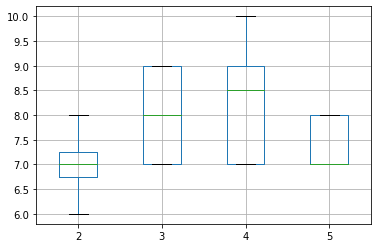

In [412]:
iimport matplotlib.pyplot as plt
iono_iter_df = pd.DataFrame(list(zip(iter_mat_rn[0],iter_mat_rn[1], iter_mat_rn[2], iter_mat_rn[3])), columns = ['2','3','4','5'])
bp = iono_iter_df.boxplot( column = ['2','3','4','5'])

Here, we can see that the convergence of the clusters for epsilon value happens in the range of 7-10 for all the clusters.

###Calculate mean for Ionosphere Data for error calculation and analysis

In [268]:
#calculate mean of Ionosphere Dataset
print("Unique Target Classes",np.unique(iono_test[iono_test.columns[34]]))
shape = (np.array(iono_test[iono_test[iono_test.columns[34]]=='b'].iloc[0,:-1]).shape)
mean1 = np.zeros(shape=shape)
mean2 = np.zeros(shape=shape)
for i in range(126):
    inst1 = np.array(iono_test[iono_test[iono_test.columns[34]]=='b'].iloc[i,:-1])
    mean1 = mean1+inst1
for i in range(225):
    inst2 = np.array(iono_test[iono_test[iono_test.columns[34]]=='g'].iloc[i,:-1])
    mean2 = mean2+inst2


Unique Target Classes ['b' 'g']
(34,)


###Calculate mean for Ringnorm Data for error calculation and analysis

In [ ]:
#calculate mean of Ringnorm Dataset
print("Unique Target Classes",np.unique(ringnorm_test[ringnorm_test.columns[21]]]))
shape = (np.array(ringnorm_test[ringnorm_test[ringnorm_test.columns[21]]==1].iloc[0,:-1]).shape)
mean_r1 = np.zeros(shape=shape)
mean_r2 = np.zeros(shape=shape)
for i in range(126):
    inst_r1 = np.array(ringnorm_test[ringnorm_test[ringnorm_test.columns[21]]==1].iloc[i,:-1])
    mean_r1 = mean_r1+inst_r1
for i in range(225):
    inst_r2 = np.array(ringnorm_test[ringnorm_test[ringnorm_test.columns[21]]==2].iloc[i,:-1])
    mean_r2 = mean_r2+inst_r2

In [392]:
#calculate errors
def error_calc(D,pred, act):
    c=0
    for i in range(len(D)):
        if (pred[i]==act[i]):
            c=c+1
  
 return (len(D)-c)/len(D)



###Function to calculate the means from the EM function and which actual cluster(good/bad) they are closest to for Ionosphere

In [385]:
#defining mean predictor
def pred_mean(m1, m2, means):
    l = []
    print(len(means))
    for i in range(len(means)):
        dist1 = np.linalg.norm(means[i] - m1)
        dist2 = np.linalg.norm(means[i] - m2)
        if ((dist1)>=(dist2)):
            l.append('g')
        else:
            l.append('b')
    return l




In [413]:
#defining mean predictor
def pred_mean_rn(m1, m2, means):
    l = []
    print(len(means))
    for i in range(len(means)):
        dist1 = np.linalg.norm(means[i] - m1)
        dist2 = np.linalg.norm(means[i] - m2)
        if ((dist1)>=(dist2)):
              l.append(1)
        else:
              l.append(2)
    return l

In [383]:
#defining y_predictor
def pred_lab(D,w, k, label_1):
    lab = []
    for i in range(len(D)):
    min = 1.1
    clust = 0
    for j in range(k+1):
        if (w[j][i]<=min):
            min = w[j][i]
            clust = j
        lab.append(label_1[clust])
    return lab


In [ ]:
y_test = np.array(iono_test.iloc[:,-1])
err = [[0 for i in range(20)] for j in range(4)]
for i in range(0,4):
    for j in range(20):

        label = [0 for lab_ind in range(i+2)]
        label = pred_mean(mean1, mean2, mean_mat_iono1[i][j])
        y_pred = pred_lab(iono,w_mat_iono1[i][j],i, label)
        err[i][j] = error_calc(iono,y_pred, y_test)

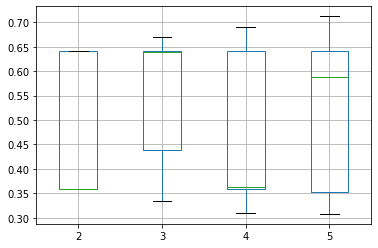

In [398]:
err_iter_df = pd.DataFrame(list(zip(err[0],err[1], err[2], err[3])), columns = ['2','3','4','5'])
bp = err_iter_df.boxplot( column = ['2','3','4','5'])

In [ ]:
y_test = np.array(ringnorm_test.iloc[:,-1])
err = [[0 for i in range(20)] for j in range(4)]
for i in range(0,4):
    for j in range(20):

    label = [0 for lab_ind in range(i+2)]
    label = pred_mean_rn(mean_r1, mean_r2, mean_mat_rn1[i][j])
    y_pred = pred_lab(ringnorm,w_mat_rn1[i][j],i, label)
    err[i][j] = error_calc(ringnorm,y_pred, y_test)

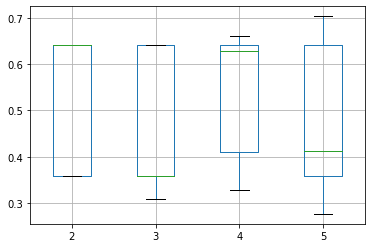

In [409]:
err_iter_df = pd.DataFrame(list(zip(err[0],err[1], err[2], err[3])), columns = ['2','3','4','5'])
bp = err_iter_df.boxplot( column = ['2','3','4','5'])

Here, we can observe the error rates for all the different clusters, when they are eventually reduced to 2 clusters. 

The accuracy of the model is not that accurate, since the huerstic is very random in the current scenario

## Problem 3: Algorithm Design

### Problem 3.1
    Given a text D and a pattern P, describe an Ω(d+p) time method for finding the longest prefix of P that is a substring of D. The lengths of D and P are d and p, respectively.

In [1]:
def process_pattern(P):
    x = 0
    y = len(P) - 1
    pattern = [0]*len(P)
    for i in range(1,len(P)):
        if P[x] == P[i]:
            x+=1
            pattern[i] = x
        else:
            while(x > 0 and pattern[x-1]!=pattern[i]):
                x-=1
            pattern[i] = x
    return pattern

def searching_pattern(T, P):
    n, m = len(T), len(P)
    i = 0
    j = 0
    max_len = 0
    pattern = process_pattern(P)
    while i < n:
        if T[i] == P[j]:
            i +=1
            j +=1
            max_len=max(j,max_len)
        else:
            while(j>0 and pattern[j]!=T[i]):
                j = pattern[j-1]
            if(P[j]!=T[i] and j==0):
                i+=1
        if(j==len(P)):
            return P[:len(P)]
    return P[:max_len]

T = 'This is a good code.'
P = 'good'
print(searching_pattern(T,P),len(searching_pattern(T,P)))

T1 = 'aaaabbbbbhhhggghggavcdfgh'
P1 = 'avcdf'
print(searching_pattern(T1,P1),len(searching_pattern(T1,P1)))

good 4
avcdf 5


### Problem 3.2   
    X, Y, and Z are three arrays and each has m elements. For an arbitrary integer t, describe O(m^2 logm)-time algorithm to determine if there exist numbers, x in X, y in Y, and z in Z, such that t = x+y+z.

### Solution:
```
We have three lists (X, Y, Z). We arranged the third list Z in sorted . Then we went through  X and  Y. Finally, in the last list, we find the value c = t-X[i]-Y[j], where i and j are indexes in lists X and Y. We find c in  Z using Binary Search. If it is present, we return True; otherwise, we return False. This algorithm's total time complexity is O(m2logm+mlogm) = O(m2logm).  m logm is used to sort the third list.
```

In [2]:
def binary_search (A, l, r, x):
    if r >= l:
        mid = l + (r - l) // 2
        if A[mid] == x:
            return True
        elif A[mid] > x:
            return binary_search(A, l, mid-1, x)
        else:
            return binary_search(A, mid + 1, r, x)
    else:
        return False

def find_triplet(X,Y,Z,t):
    Z.sort()
    for i in range(len(X)):
        a = X[i]
        for j in range(len(Y)):
            b = Y[j]
            if(binary_search(Z,0,len(Z)-1,t-a-b)):
                print(a,b,t-a-b)
                return True
    return False

X = [7,6,3,4,8,4,1]
Y = [1,8,3,5,7,6,2]
Z = [0,7,3,6,4,8,4]
T = 10

find_triplet(X,Y,Z,T)

7 3 0


True

### Problem 3.3
    Describe an efficient algorithm for deleting a string from a compressed trie and analyze its running time.

### Algorithm : 
 
Input: Compressed Trie = T
       String = s

Output: T without s 


```
Compressed_tries_deletion(T, s)
  if s not in T 
    then return False
  else 
    let u be the node where s was found 
    
    if s is not equal to the whole string ended at u or u has a child 
        return False // we cannot delete an internal node 
    let v be the parent of u 
    delete u 
    if v has a child c then
        v.string = v.string + c.string 
        merge v and c into a single node 
  return Succesful Deletion
```
The Time complexity for the algorithm designed for deletion of a string in a compressed trie is O(N)
#### Example:

Let T contains words: {'Harshit','Bloomington','Indiana','USA','Canada'}

To do : Delete Canada

So, first, we will crawl from root to n of Canada, checking whether or not all of the letters of Canada are present.
Let v be the parent of Canada's node n.
We will delete n once we reach n.
If v has a child named c, merge c with v and delete c.
We will delete the n,e, and r of the string Canada because it has no children.

Compressed Trie: {'Harshit','Bloomington','Indiana','USA'}